In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df = pd.read_csv("/kaggle/input/loan-approval-dataset/loan_data.csv")
df.shape
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [3]:
df.loc[df.duplicated()]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


<Axes: xlabel='person_age'>

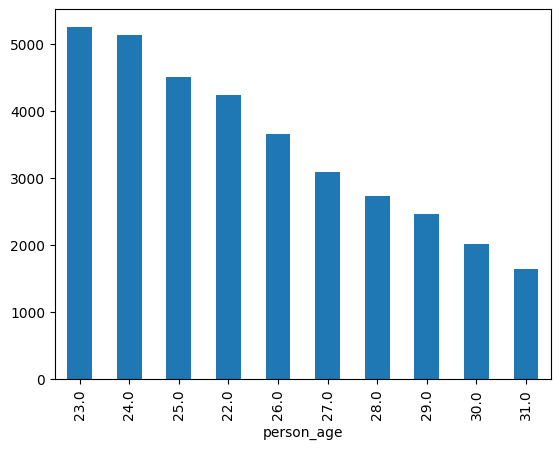

In [4]:
df['person_age'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='Age', ylabel='Income'>

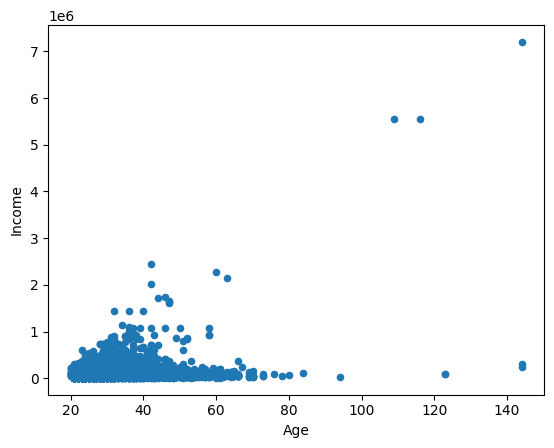

In [5]:
df.plot(kind= 'scatter', x='person_age', y='person_income', xlabel='Age', ylabel='Income')

<Axes: xlabel='person_age', ylabel='person_income'>

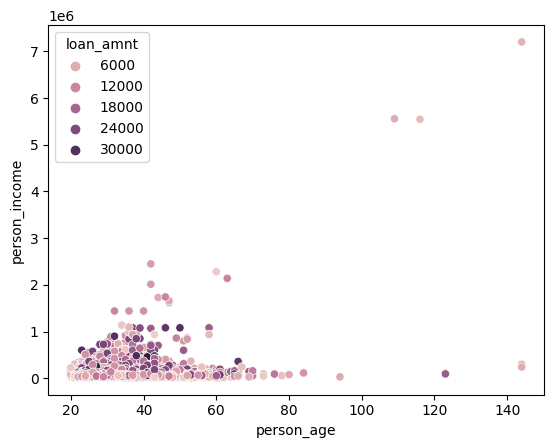

In [6]:
sns.scatterplot( x='person_age', y='person_income', hue='loan_amnt', data=df)

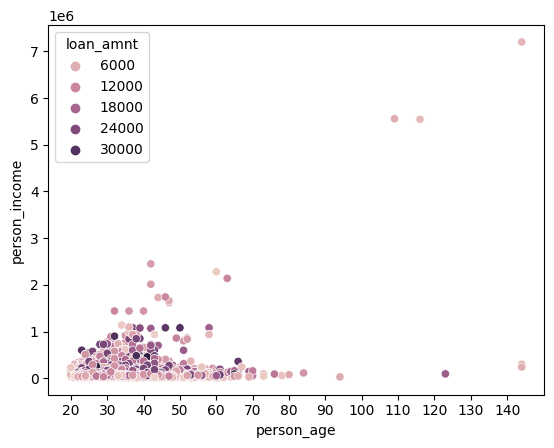

In [7]:
sns.scatterplot( x='person_age', y='person_income', hue='loan_amnt', data=df)
plt.xticks(ticks=range(int(df['person_age'].min()), int(df['person_age'].max()) + 1, 10))
plt.show()

In [8]:
sample_df = df.sample(n=100, random_state=1)  

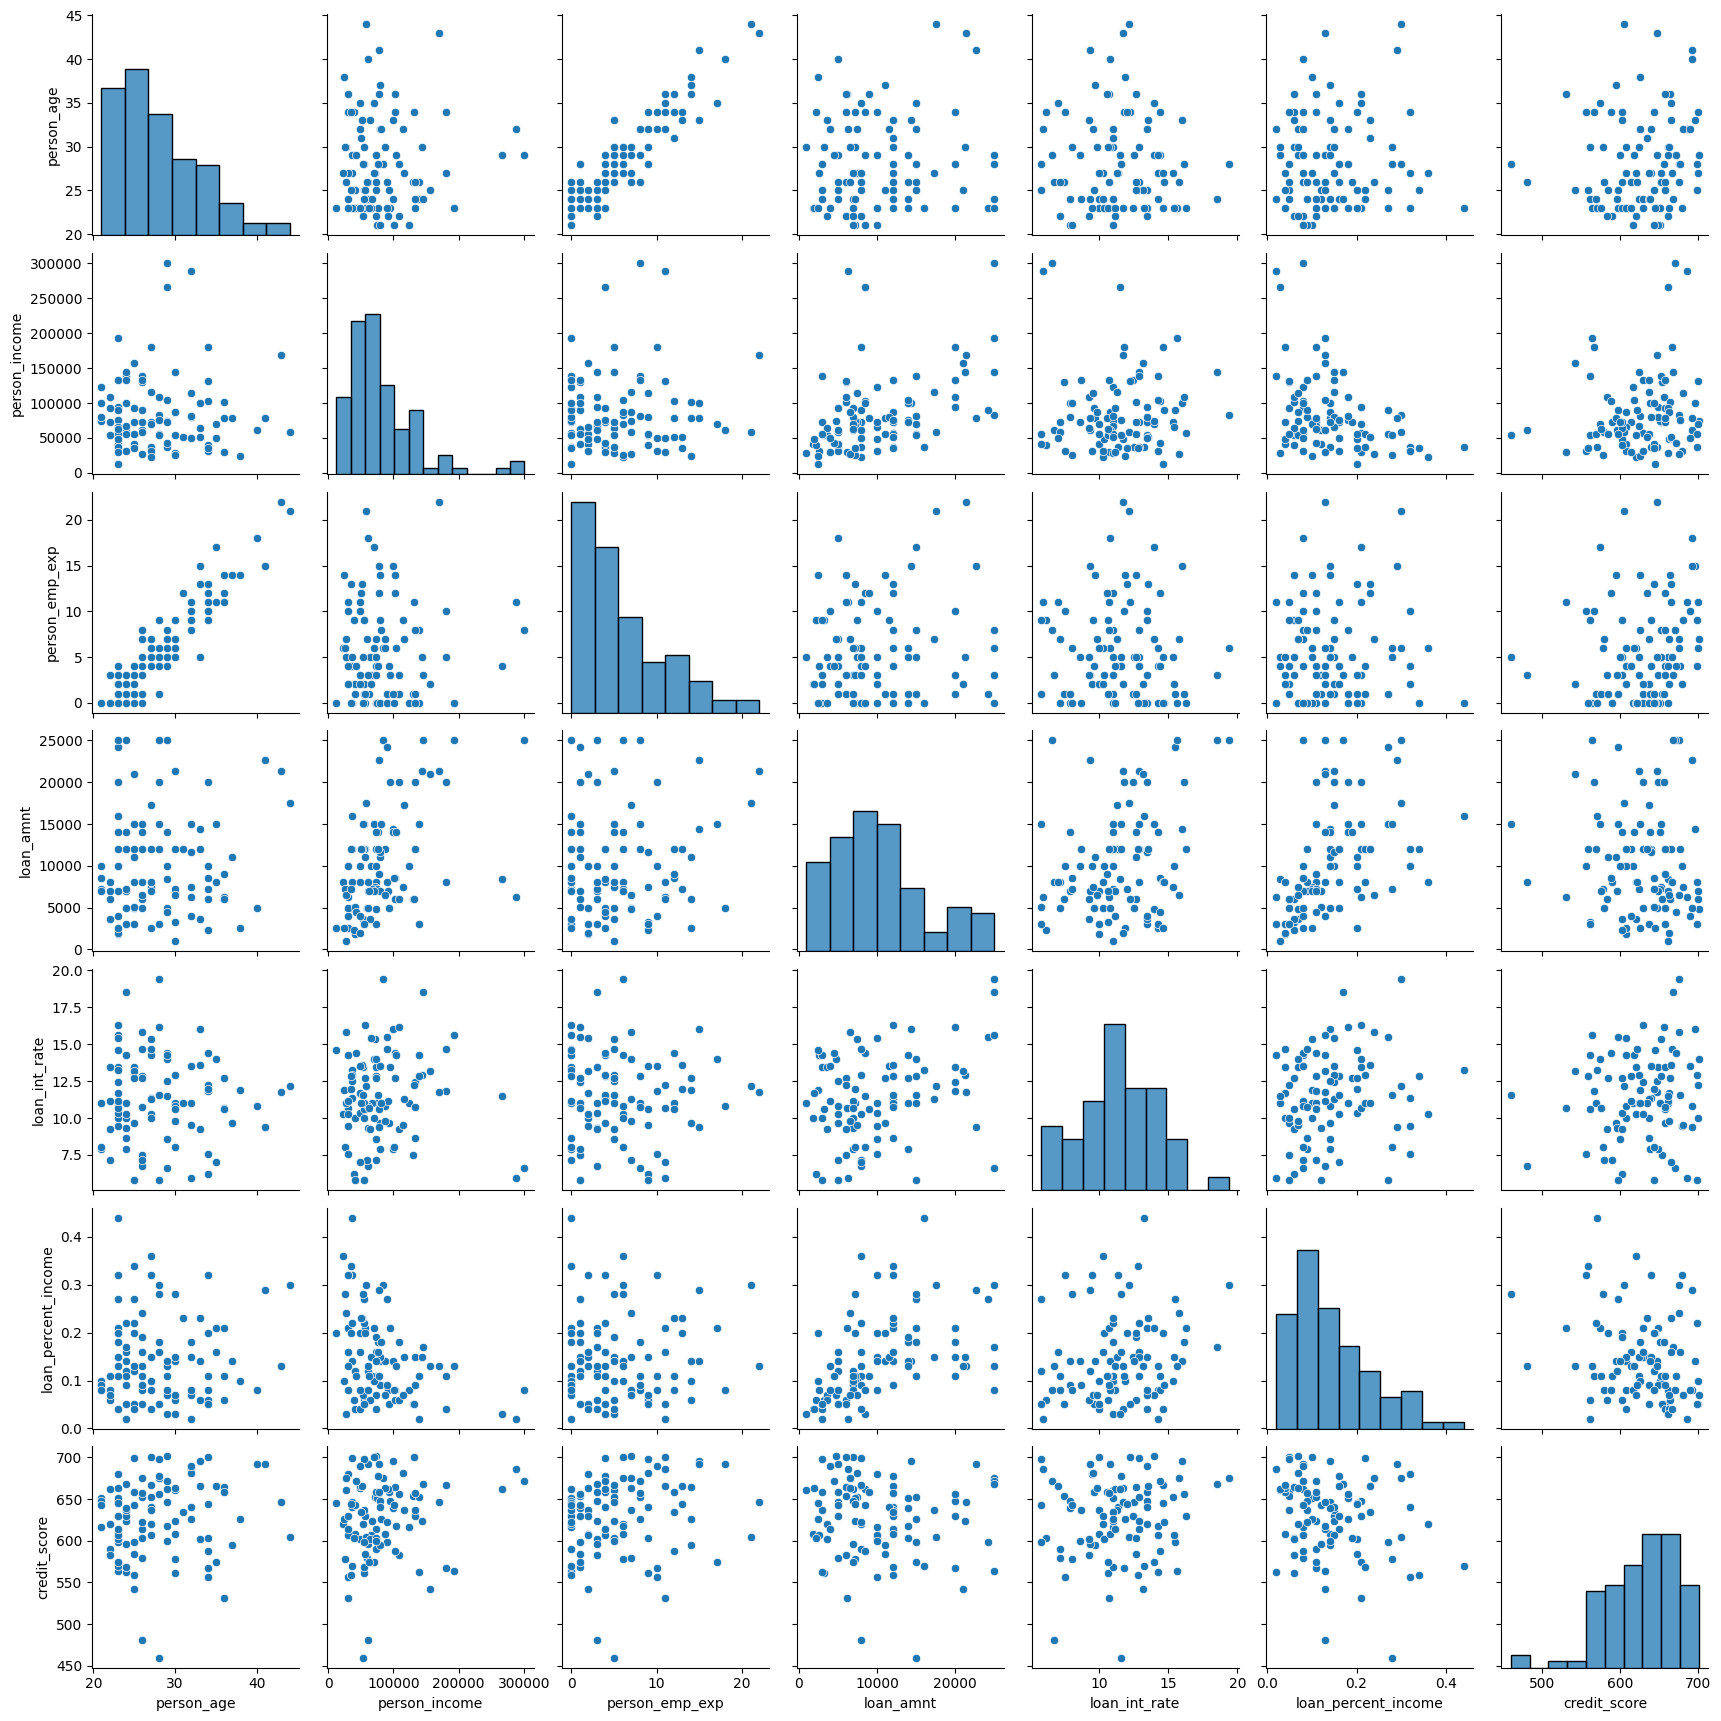

In [9]:
sns.pairplot(sample_df, vars=['person_age',
                       'person_income',
                       'person_emp_exp',
                       'loan_amnt',
                       'loan_int_rate',
                       'loan_percent_income',
                       'credit_score',])
plt.show()

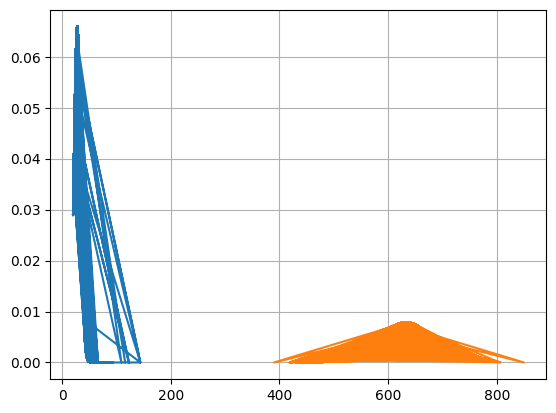

In [10]:
mean_age = df['person_age'].mean()
std_age = df['person_age'].std()
mean_credit = df['credit_score'].mean()
std_credit = df['credit_score'].std()

pdf1 = norm.pdf(df['person_age'], mean_age, std_age)
pdf2 = norm.pdf(df['credit_score'], mean_credit, std_credit)

plt.plot(df['person_age'],pdf1)
plt.plot(df['credit_score'],pdf2)
plt.grid(True)
plt.show()

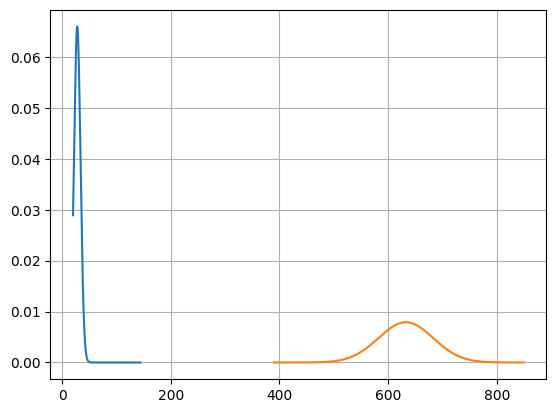

In [11]:
x_age = np.linspace(df['person_age'].min(), df['person_age'].max(), 1000)
x_credit = np.linspace(df['credit_score'].min(), df['credit_score'].max(), 1000)
#this is inaccurate since we have created an enitirely new data to get a smoother curve, this isn't
#giving us an accurate PDF(Probability Density Function)
mean_age = df['person_age'].mean()
std_age = df['person_age'].std()
mean_credit = df['credit_score'].mean()
std_credit = df['credit_score'].std()

pdf1 = norm.pdf(x_age, mean_age, std_age)
pdf2 = norm.pdf(x_credit, mean_credit, std_credit)

plt.plot(x_age, pdf1,)
plt.plot(x_credit, pdf2)
plt.grid(True)